In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

from pyevtk.hl import gridToVTK, pointsToVTK

In [3]:
import numpy as np

from astropy.table import Table

idsource = input("Insert your field id: \n >> ")
idsource = int(idsource)

t_name = "/Users/ioanaciuca/Desktop/make_dwarfs/gdr2_files/gdr2_source%s.fits"% int(idsource)

data = Table.read(t_name, format = "fits")
data = data[(data["Plx"] > -1000) & (data["Teff"] > 0)]

print("Data length is", len(data))

Insert your field id: 
 >> 1


/Users/ioanaciuca/anaconda3/envs/DSFP/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


Data length is 14505


In [ ]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.models import Range1d

x = np.array(data["pmRA"])
y = np.array(data["pmDE"])
z = np.array(1.0/ data["Plx"])

bins = hexbin(x, y, 0.2)

p = figure(title="Manual hex bin for 50000 points", tools="wheel_zoom,reset",
           match_aspect=True, background_fill_color='#440154')
p.x_range = Range1d(-15, 10)
p.y_range = Range1d(-15, 10)
p.grid.visible = False

p.hex_tile(q="q", r="r", size=0.1, line_color=None, source=bins,
           fill_color=linear_cmap('counts', 'Viridis256', 0, max(bins.counts)))

output_file("hex_tile.html")

show(p)

(array([  1.,   5.,   6.,  12.,   3.,  15.,  21.,  19.,   5.,  13.]),
 array([ 3369.33 ,  3628.997,  3888.664,  4148.331,  4407.998,  4667.665,
         4927.332,  5186.999,  5446.666,  5706.333,  5966.   ]),
 <a list of 10 Patch objects>)

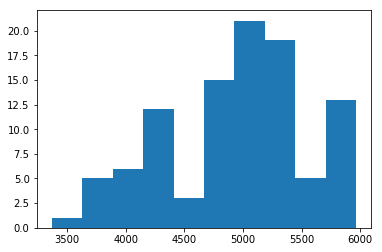

In [5]:
x = np.array(data["pmRA"])[:1000]
y = np.array(data["pmDE"])[:1000]
z = np.array(data["Plx"])[:1000]

xp, yp, zp = np.meshgrid(x[:-1] + np.diff(x)/2,y[:-1] + np.diff(y)/2, z[:-1] + np.diff(z)/2, indexing = 'ij')
temp = np.array(data["Teff"])[:100]

import matplotlib.pyplot as plt
plt.hist(temp)

In [ ]:
gridToVTK("./gdr2_trial", xp, yp, zp, pointData = {"temp" : temp})